There are n items each belonging to zero or one of m groups where group[i] is the group that the i-th item belongs to and it's equal to -1 if the i-th item belongs to no group. The items and the groups are zero indexed. A group can have no item belonging to it.

Return a sorted list of the items such that:

    The items that belong to the same group are next to each other in the sorted list.
    There are some relations between these items where beforeItems[i] is a list containing all the items that should come before the i-th item in the sorted array (to the left of the i-th item).

Return any solution if there is more than one solution and return an empty list if there is no solution.

 

Example 1:

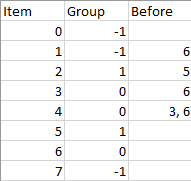

Input: n = 8, m = 2, group = [-1,-1,1,0,0,1,0,-1], beforeItems = [[],[6],[5],[6],[3,6],[],[],[]]
Output: [6,3,4,1,5,2,0,7]

Example 2:

Input: n = 8, m = 2, group = [-1,-1,1,0,0,1,0,-1], beforeItems = [[],[6],[5],[6],[3],[],[4],[]]
Output: []
Explanation: This is the same as example 1 except that 4 needs to be before 6 in the sorted list.

 

Constraints:

    1 <= m <= n <= 3 * 104
    group.length == beforeItems.length == n
    -1 <= group[i] <= m - 1
    0 <= beforeItems[i].length <= n - 1
    0 <= beforeItems[i][j] <= n - 1
    i != beforeItems[i][j]
    beforeItems[i] does not contain duplicates elements.



In [ ]:
class Solution:
    def sortItems(self, n: int, m: int, group: List[int], beforeItems: List[List[int]]) -> List[int]:
        # If an item belongs to zero group, assign it a unique group id.
        group_id = m
        for i in range(n):
            if group[i] == -1:
                group[i] = group_id
                group_id += 1
        
        # Sort all item regardless of group dependencies.
        item_graph = [[] for _ in range(n)]
        item_indegree = [0] * n
        
        # Sort all groups regardless of item dependencies.
        group_graph = [[] for _ in range(group_id)]
        group_indegree = [0] * group_id      
        
        for curr in range(n):
            for prev in beforeItems[curr]:
                # Each (prev -> curr) represents an edge in the item graph.
                item_graph[prev].append(curr)
                item_indegree[curr] += 1
                
                # If they belong to different groups, add an edge in the group graph.
                if group[curr] != group[prev]:
                    group_graph[group[prev]].append(group[curr])
                    group_indegree[group[curr]] += 1      
        
        # Tologlogical sort nodes in graph, return [] if a cycle exists.
        def topologicalSort(graph, indegree):
            visited = []
            stack = [node for node in range(len(graph)) if indegree[node] == 0]
            while stack:
                cur = stack.pop()
                visited.append(cur)
                for neib in graph[cur]:
                    indegree[neib] -= 1
                    if indegree[neib] == 0:
                        stack.append(neib)
            return visited if len(visited) == len(graph) else []

        item_order = topologicalSort(item_graph, item_indegree)
        group_order = topologicalSort(group_graph, group_indegree)
        
        if not item_order or not group_order: 
            return []
        
        # Items are sorted regardless of groups, we need to 
        # differentiate them by the groups they belong to.
        ordered_groups = collections.defaultdict(list)
        for item in item_order:
            ordered_groups[group[item]].append(item)
        
        # Concatenate sorted items in all sorted groups.
        # [group 1, group 2, ... ] -> [(item 1, item 2, ...), (item 1, item 2, ...), ...]
        answer = []
        for group_index in group_order:
            answer += ordered_groups[group_index]
        return answer